<a href="https://colab.research.google.com/github/clementlemon02/credit-card-approval-prediction/blob/main/Credit%20Card%20Approcal%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Comparison of Regression and Classification Models for Credit Card Approval Prediction**

The dataset consist of two CSV files: application.csv which contains credit card application data of credit card applicants and credit_record.csv which contains past credit records of a client or applicant. With this dataset, we aim to predict the credibility of a credit card applicant ('good' or 'bad') by predicting a credit score based on provided credit card application particulars.

We have applied 4 types of machine learning algorithms, namely the Simple Linear Regression, Polynomial Linear Regression, Logistic Regression and Random Forest model. All of these models are provided by [scikit-learn](https://scikit-learn.org/stable/). The linear regression model and the random forest model output a continuous credit score ranging from 0 to 1 whereas the logistic regression model outputs a class value of 0 or 1 which indicates whether a client is 'good' or 'bad' to the bank.

We first upload the dataset files and import the dataset and necessary packages for the subsequent parts of this project.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, Normalizer, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [ ]:
# Import datasets

# Method 1: Mount from Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
#application_details = pd.read_csv("/content/drive/MyDrive/application.csv").drop("Unnamed: 0", axis=1)
#credit_record = pd.read_csv("/content/drive/MyDrive/credit_record.csv").drop("Unnamed: 0", axis=1)

# Method 2: Upload dataset to Colab and read
application_details = pd.read_csv("/content/application.csv").drop("Unnamed: 0", axis=1)
credit_record = pd.read_csv("/content/credit_record.csv").drop("Unnamed: 0", axis=1)

### Data pre-processing

Before actually applying the dataset into the models, preliminary analysis and pre-processing on the data need to be performed. In this stage, the following data cleaning procedure have been performed:
- Checking of dataset sizes
- Handling of empty/missing values
- Handling of outliers in data
- Filtering of illogical data
- Encoding of categorical data into numerical form
- Numerical data conversion to serve our purposes
- Checking of common unique rows by id and assignment of credit scores

We first read the two CSV files in the dataset using `pandas` and have a quick look at their sizes and statistical information.

**Application Data**

We first start with application.csv.

In [ ]:
application_details

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,job,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
gender            = application_details["gender"]
own_car           = application_details["own_car"]
own_realty        = application_details["own_realty"]
num_child         = application_details["num_child"]
income            = application_details["income"]
income_type       = application_details["income_type"]
edu_level         = application_details["education_level"]
fam_status        = application_details["family_status"]
house_type        = application_details["house_type"]
birth_day         = application_details["birth_day"]
employment_length = application_details["employment_length"]
mobile            = application_details["mobile"]
work_phone        = application_details["work_phone"]
phone             = application_details["phone"]
email             = application_details["email"]
job               = application_details["job"]
num_fam_mem       = application_details["CNT_FAM_MEMBERS"]



In [ ]:
print(" ________________________")
print("|APPLICATION DETAILS INFO|")
print("|________________________|")
application_details.info()

 ________________________
|APPLICATION DETAILS INFO|
|________________________|
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 438557 non-null  int64  
 1   gender             438557 non-null  object 
 2   own_car            438557 non-null  object 
 3   own_realty         438557 non-null  object 
 4   num_child          438557 non-null  int64  
 5   income             438557 non-null  float64
 6   income_type        438557 non-null  object 
 7   education_level    438557 non-null  object 
 8   family_status      438557 non-null  object 
 9   house_type         438557 non-null  object 
 10  birth_day          438557 non-null  int64  
 11  employment_length  438557 non-null  int64  
 12  mobile             438557 non-null  int64  
 13  work_phone         438557 non-null  int64  
 14  phone              4

In [ ]:
application_details.describe().T

,count,mean,std,min,25%,50%,75%,max
id,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
num_child,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
income,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
birth_day,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
employment_length,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
mobile,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
work_phone,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
phone,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
email,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


The above show that excluding the header row, the application data file contains 438556 rows and 18 feature variables (columns). Among the 18 features, 10 of them are numerical and 8 of them are categorical. Out of the 10 numerical data, 4 of them in fact come in binary form, as they indicate the presence (or absence) of a certain feature.

We then check for empty entries in the data.

In [ ]:
# Check for empty entries
application_details.isnull().sum()

id                        0
gender                    0
own_car                   0
own_realty                0
num_child                 0
income                    0
income_type               0
education_level           0
family_status             0
house_type                0
birth_day                 0
employment_length         0
mobile                    0
work_phone                0
phone                     0
email                     0
job                  134203
CNT_FAM_MEMBERS           0
dtype: int64

The above show that there is only one column (the `job` column) that has missing entries, and there are 134203 rows of them.

Our approach to these missing values is that we decide to drop the `job` column entirely, as there are other features that are similar to the nature of this column, such as `work_phone`, `email` and `employment_length`.

In [ ]:
# Remove column with empty entries (job)
application_details = application_details.drop(["job"], axis=1)

application_details

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,2.0


Afterwards, we perform some preliminary data conversion so that the values are suitable for model training later.

The data conversion steps performed include:
- converting binary data in string form (`Y`, `N`) into numerical form (`0`, `1`)
- filtering out illogical data rows (which include rows with age smaller than employment length, with negative income and with current family member number smaller than child number
- converting `birth_day` and `employment_length` values which are initially in negative form into positive form

In [ ]:
# Convert categorical binary data to numerical binary data
application_details["own_car"] = own_car.replace(["Y", "N"], [1, 0])
application_details["own_realty"] = own_realty.replace(["Y", "N"], [1, 0])

application_details

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,0,1,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,1.0
438553,6840222,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0
438555,6842765,F,0,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,2.0


In [ ]:
# Filter illogical data: rows with age smaller than employment length, negative income, current family member number fewer than child number

application_details = application_details.loc[(abs(birth_day) - abs(employment_length) > 16*365) &
                        (income > 0) &
                        (num_fam_mem - num_child > 0)]

application_details

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438547,6839917,F,0,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-10966,-2704,1,0,0,0,2.0
438548,6839936,M,1,1,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,3.0
438553,6840222,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0


In [ ]:
application_details["employment_length"].mask(employment_length > 0, 0, inplace=True) # replace positive employment_length value (365243) by 0
application_details["employment_length"].mask(employment_length < 0, abs(employment_length), inplace=True) # replace negative employment_length value by its absolute value
application_details["birth_day"].mask(birth_day < 0, abs(birth_day), inplace=True) # replace negative birth_day value by its absolute value

application_details

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,2.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438547,6839917,F,0,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,10966,2704,1,0,0,0,2.0
438548,6839936,M,1,1,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,12569,2095,1,0,0,0,3.0
438553,6840222,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,15939,3007,1,0,0,0,1.0
438554,6841878,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,8169,372,1,1,0,0,1.0


Using box plot, we attempt to look for possible outliers in the data, and the plots are as shown below.

The plots show that while there are some data values presented as points in the plots, they seem to be fairly evenly distributed. Furthermore, these data points still reflect the sensible distribution of the involved features. Hence, we decide not to remove these values from our model training.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


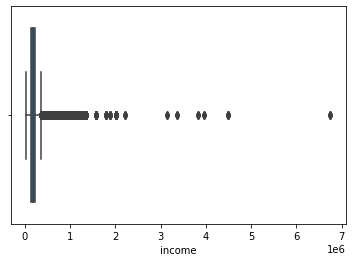

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


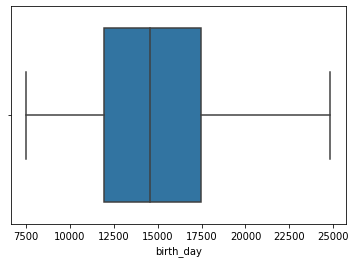

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


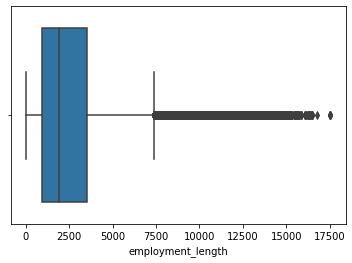

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


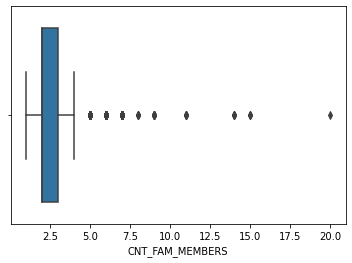

In [ ]:
# Visualise numerical data with box plot to look for outliers

sns.boxplot(application_details["income"])
plt.show()
sns.boxplot(application_details["birth_day"])
plt.show()
sns.boxplot(application_details["employment_length"])
plt.show()
sns.boxplot(application_details["CNT_FAM_MEMBERS"])
plt.show()

Next, we encode the ordinal categorical data in the data file into a numerical form.

We propose two approaches to this, one is through manual assignment of numerical values based on the hierarhical meaning of the features, and another one is through the use of `sklearn`'s `OrdinalEncoder`, with features arranged in a self-defined order.

Here, we choose the second approach for the subsequent parts.

In [ ]:
# Listing of unique values of categorical data
print(application_details["house_type"].unique())
print(application_details["family_status"].unique())
print(application_details["education_level"].unique())
print(application_details["income_type"].unique())

['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']


In [ ]:
# Conversion of categorical data into numerical data
# Approach 1: Manual assignment based on meaning of feature variables
# (not used)


#scale_house = {'Rented apartment':1, 'House / apartment':2, 'Municipal apartment':0,
#'With parents':0, 'Co-op apartment':0, 'Office apartment':0}
#scale_family = {'Civil marriage':2, 'Married':2, 'Single / not married':1, 'Separated':0, 'Widow':0}
#scale_education = {'Higher education':2, 'Secondary / secondary special':0, 'Incomplete higher':1,
#'Lower secondary':0, 'Academic degree':2}
#scale_income = {'Working':2, 'Commercial associate':2, 'Pensioner':1, 'State servant':2, 'Student':0}


#application_details["house_type"] = application_details["house_type"].replace(scale_house)
#application_details["family_status"] = application_details["family_status"].replace(scale_family)
#application_details["education_level"] = application_details["education_level"].replace(scale_education)
#application_details["income_type"] = application_details["income_type"].replace(scale_income)
#application_details

In [ ]:
# Conversion of categorical data into numerical data
# Approach 2: Using sklearn's OrdinalEncoder

house_type = ['With parents', 'Co-op apartment', 'Office apartment', 'Municipal apartment', 'Rented apartment', 'House / apartment']
family_status = ['Separated', 'Widow', 'Single / not married', 'Married', 'Civil marriage']
education = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']
income_type = ['Student', 'Pensioner', 'Working', 'State servant', 'Commercial associate']

appl_ord_enc = OrdinalEncoder(categories=[house_type, family_status, education, income_type])
appl_encoded = appl_ord_enc.fit_transform(application_details[['house_type', 'family_status', 'education_level', 'income_type']])
application_details[['house_type', 'family_status', 'education_level', 'income_type']] = appl_encoded

application_details

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS
0,5008804,M,1,1,0,427500.0,2.0,3.0,4.0,4.0,12005,4542,1,1,0,0,2.0
1,5008805,M,1,1,0,427500.0,2.0,3.0,4.0,4.0,12005,4542,1,1,0,0,2.0
2,5008806,M,1,1,0,112500.0,2.0,1.0,3.0,5.0,21474,1134,1,0,0,0,2.0
3,5008808,F,0,1,0,270000.0,4.0,1.0,2.0,5.0,19110,3051,1,0,1,1,1.0
4,5008809,F,0,1,0,270000.0,4.0,1.0,2.0,5.0,19110,3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438547,6839917,F,0,1,0,180000.0,1.0,3.0,3.0,5.0,10966,2704,1,0,0,0,2.0
438548,6839936,M,1,1,1,135000.0,2.0,1.0,3.0,5.0,12569,2095,1,0,0,0,3.0
438553,6840222,F,0,0,0,103500.0,2.0,1.0,2.0,5.0,15939,3007,1,0,0,0,1.0
438554,6841878,F,0,0,0,54000.0,4.0,3.0,2.0,0.0,8169,372,1,1,0,0,1.0


**Credit Record Data**

We then proceed with credit_record.csv.

In [ ]:
credit_record

,id,month_bal,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
credit_record.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
month_bal,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


In [ ]:
print(" __________________")
print("|CREDIT RECORD INFO|")
print("|__________________|")
credit_record.info()

 __________________
|CREDIT RECORD INFO|
|__________________|
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1048575 non-null  int64 
 1   month_bal  1048575 non-null  int64 
 2   status     1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Next, we extract credit records in which their corresponding `id` is in the application records data.

In [ ]:
# Filter out credit records where id is in application records dataset
credit_record_unique = credit_record.loc[credit_record["id"].isin(application_details["id"].unique())]

credit_record_unique

,id,month_bal,status
92938,5008804,0,C
92939,5008804,-1,C
92940,5008804,-2,C
92941,5008804,-3,C
92942,5008804,-4,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


Based on the entries in the `status` column, we then compute our self-defined 'credit score' which has a range from 0 to 1 for each unique `id` in the credit record data. The logic of this 'credit score' is explained below. 0 is the worst value whereas 1 is the best value in terms of credibility.

This 'credit score' will be our dependent variable for model training and prediction later on.

Finally, we perform an inner joining of the application record and credit record data to produce a data frame with unique `ids` which are present in both of the datasets, their corresponding application particulars and their credit score.

Here, we have obtained a cleaned-up dataset, and this concludes the data pre-processing part of this project.

In [ ]:
# Compute a 'normalised' credit score based on the following logic, and then produce a data frame with matching application records and credit statuses merged:
# 1. Assign different statuses a 'score' from 0 to 7 based on the purpose of the classification, where 0 represents the worst and 7 represents the best
# 2. For a unique id, calculate the ratio between the sum of its 'scores' and the maximum possible 'score' it can obtain given its existing number of months

# Helper function for computing credit score
# NOTE: Please expect around 40 seconds for the function to finish executing due to the large size of the dataset.
def convert_credit_score(df: pd.DataFrame, status: list) -> list:
    df["status"] = df["status"].replace(status, [7, 6, 5, 4, 3, 2, 1, 0])
    credit_scores = []
    for id in df["id"].unique():
        id_rows = df.loc[df["id"] == id]
        sum = id_rows["status"].sum()
        max = 7 * id_rows.shape[0]
        score = sum / max
        credit_scores.append(score)
    return credit_scores

appl = application_details.loc[application_details["id"].isin(credit_record["id"].unique())]

# PRIORITISING BANK PROFIT:
# credit_scores_profit = convert_credit_score(credit_record_unique, ["0", "1", "C", "X", "2", "3", "4", "5"])
# id_credit_score_profit = pd.DataFrame({"id": credit_record_unique["id"].unique(), "score": credit_scores_profit})
# appl_id_credit_score_profit = pd.merge(appl, id_credit_score_profit)
# appl_id_credit_score_profit

# PRIORITISING PAYMENT ON TIME:
credit_scores = convert_credit_score(credit_record_unique, ["C", "X", "0", "1", "2", "3", "4", "5"])
id_credit_score = pd.DataFrame({"id": credit_record_unique["id"].unique(), "score": credit_scores})
appl_id_credit_score = pd.merge(appl, id_credit_score)


appl_id_credit_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS,score
0,5008804,M,1,1,0,427500.0,2.0,3.0,4.0,4.0,12005,4542,1,1,0,0,2.0,0.946429
1,5008805,M,1,1,0,427500.0,2.0,3.0,4.0,4.0,12005,4542,1,1,0,0,2.0,0.942857
2,5008806,M,1,1,0,112500.0,2.0,1.0,3.0,5.0,21474,1134,1,0,0,0,2.0,0.857143
3,5008808,F,0,1,0,270000.0,4.0,1.0,2.0,5.0,19110,3051,1,0,1,1,1.0,0.800000
4,5008809,F,0,1,0,270000.0,4.0,1.0,2.0,5.0,19110,3051,1,0,1,1,1.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30309,5149828,M,1,1,0,315000.0,2.0,1.0,3.0,5.0,17348,2420,1,0,0,0,2.0,0.583333
30310,5149834,F,0,1,0,157500.0,4.0,3.0,3.0,5.0,12387,1325,1,0,1,1,2.0,0.458333
30311,5149838,F,0,1,0,157500.0,1.0,3.0,3.0,5.0,12387,1325,1,0,1,1,2.0,0.606061
30312,5150049,F,0,1,0,283500.0,2.0,1.0,3.0,5.0,17958,655,1,0,0,0,2.0,0.671429


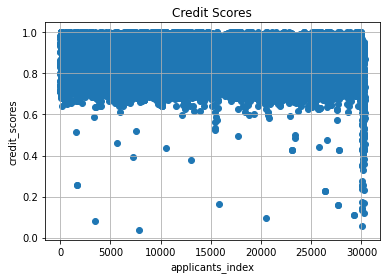

In [ ]:
# Visualise credit score data with scatter plot
x_axis = range(appl_id_credit_score.shape[0])
score = appl_id_credit_score["score"]


plt.scatter(x_axis, score)
plt.grid()
plt.xlabel('applicants_index')
plt.ylabel('credit_scores')
plt.title('Credit Scores')
plt.show()

## Simple Linear Regression Model

With our dataset cleaned up, we can proceed to apply it into our models.

We first start with linear regression model, which produces a predicted credit score output ranging from 0 to 1 based on input application data.

Here, we apply the approach of simple linear regression with SGD, using `SGDRegressor()` provided by `sklearn`.

In [ ]:
X = appl_id_credit_score[['own_car', 'own_realty', 'num_child', 'income',
       'income_type', 'education_level', 'family_status', 'house_type',
       'birth_day', 'employment_length', 'mobile', 'work_phone', 'phone',
       'email', 'CNT_FAM_MEMBERS']]

y = appl_id_credit_score.score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24251, 15)
(6063, 15)
(24251,)
(6063,)


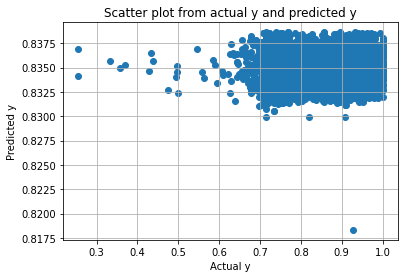

Mean Squared Error: 0.008620967687632798
Mean Absolute Error:  0.1650559912177925


In [ ]:
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)


X_test=np.array(X_test)
y_test=np.array(y_test)

n_iter=100
lm = SGDRegressor(max_iter=n_iter, learning_rate = "constant")
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
plt.scatter(y_test, y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error:',mean_squared_error(y_test, y_pred))

print('Mean Absolute Error: ', np.mean(abs(y_pred - y_test/ (y_test))))

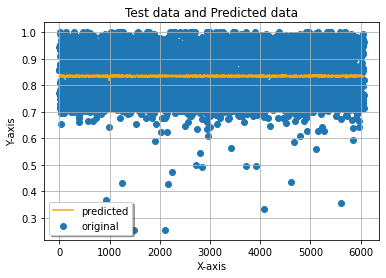

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted", color = "orange")
plt.title("Test data and Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
# Plot learning curve function
# Code based on example provided at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, scoring=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training samples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Testing score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training samples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

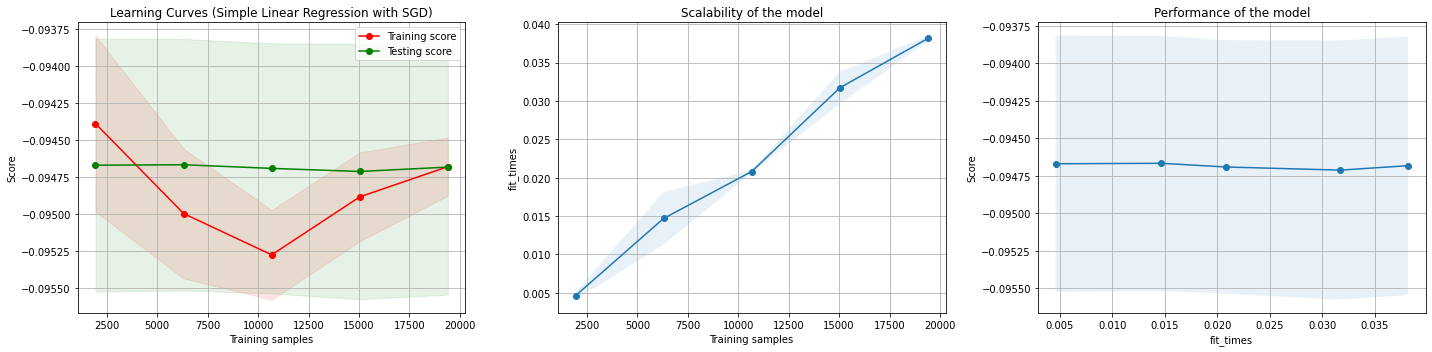

In [ ]:
# Plot learning curve
# Negative root-mean-squared error is used as loss metric
X, y = X_train, y_train
title = "Learning Curves (Simple Linear Regression with SGD)"
estimator = SGDRegressor()

plot_learning_curve(
    estimator,
    title,
    X,
    y,
    scoring="neg_root_mean_squared_error"
)

plt.tight_layout()
plt.show()

## Modification of Simple Linear Regression Model: Duplicating Minority Samples

From the threshold value we set for the definition of "good" and "bad" clients, only <100 clients are considered "bad", and all the other 30k clients are "good", this indicates the imbalance of the data, thus leading to the overfitting of the model to the "good" clients.

A simple approach to "overcome" this problem is by duplicating the minority sample, and observing whether there will be any changes in the prediction of the model.

In the approach below, we replicated 8k of the "worst" client, i.e. the client with the lowest credit score calculated.

In [ ]:
test = appl_id_credit_score.copy(deep=True)

id_with_min_score = appl_id_credit_score["id"][appl_id_credit_score["score"].idxmin()]

# The id for the worst client is 5042064
a = appl_id_credit_score[appl_id_credit_score["id"] == id_with_min_score]

# Duplication of the data
for i in range(8000):
    test = pd.concat([test, a], ignore_index=True)
test

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS,score
0,5008804,M,1,1,0,427500.0,2.0,3.0,4.0,4.0,12005,4542,1,1,0,0,2.0,0.946429
1,5008805,M,1,1,0,427500.0,2.0,3.0,4.0,4.0,12005,4542,1,1,0,0,2.0,0.942857
2,5008806,M,1,1,0,112500.0,2.0,1.0,3.0,5.0,21474,1134,1,0,0,0,2.0,0.857143
3,5008808,F,0,1,0,270000.0,4.0,1.0,2.0,5.0,19110,3051,1,0,1,1,1.0,0.800000
4,5008809,F,0,1,0,270000.0,4.0,1.0,2.0,5.0,19110,3051,1,0,1,1,1.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38309,5042064,F,1,0,2,270000.0,3.0,3.0,3.0,5.0,16053,7369,1,1,1,0,4.0,0.037594
38310,5042064,F,1,0,2,270000.0,3.0,3.0,3.0,5.0,16053,7369,1,1,1,0,4.0,0.037594
38311,5042064,F,1,0,2,270000.0,3.0,3.0,3.0,5.0,16053,7369,1,1,1,0,4.0,0.037594
38312,5042064,F,1,0,2,270000.0,3.0,3.0,3.0,5.0,16053,7369,1,1,1,0,4.0,0.037594


In [ ]:
X = test[['own_car', 'own_realty', 'num_child', 'income',
       'income_type', 'education_level', 'family_status', 'house_type',
       'birth_day', 'employment_length', 'mobile', 'work_phone', 'phone',
       'email', 'CNT_FAM_MEMBERS']]

y = test.score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30651, 15)
(7663, 15)
(30651,)
(7663,)


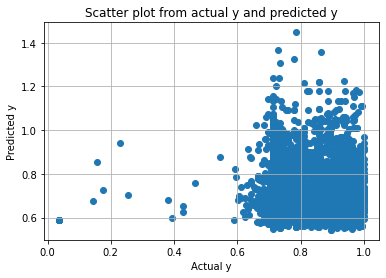

Mean Squared Error: 0.08996857946054347
Mean Absolute Error:  0.3194669586475645


In [ ]:
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)


X_test=np.array(X_test)
y_test=np.array(y_test)

n_iter=100
lm = SGDRegressor(max_iter=n_iter, learning_rate = "constant")
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
plt.scatter(y_test, y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error:',mean_squared_error(y_test, y_pred))

print('Mean Absolute Error: ', np.mean(abs(y_pred - y_test/ (y_test))))

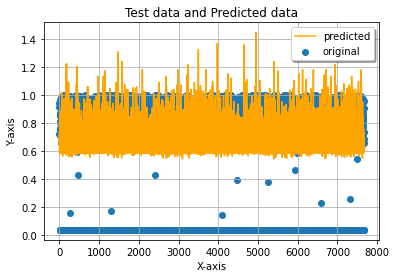

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted", color = "orange")
plt.title("Test data and Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

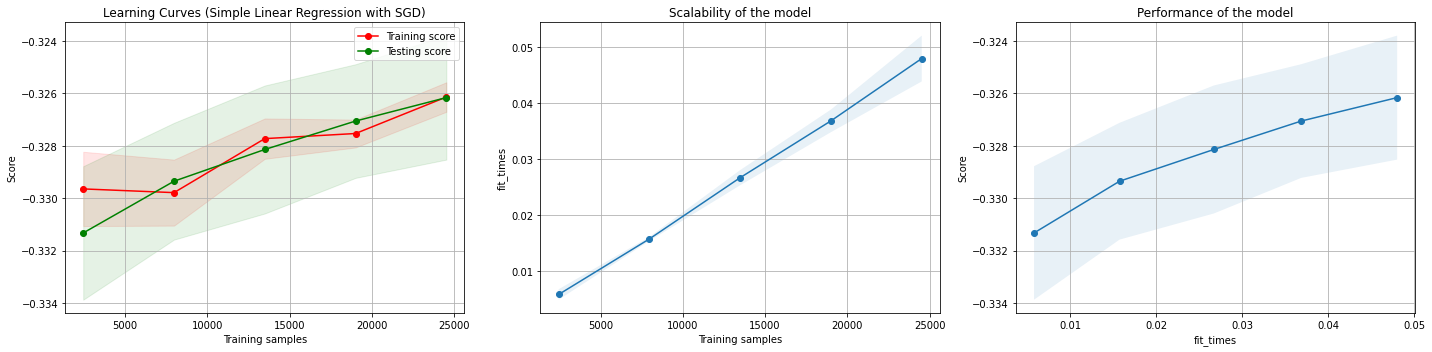

In [ ]:
X, y = X_train, y_train
title = "Learning Curves (Simple Linear Regression with SGD)"
estimator = SGDRegressor()

plot_learning_curve(
    estimator,
    title,
    X,
    y,
    scoring="neg_root_mean_squared_error"
)

plt.tight_layout()
plt.show()

## Polynomial Linear Regression Model

The model used here is polynomial linear regression model with stochastic gradient descent (SGD), provided by `sklearn`.

In [ ]:
# Normalise numerical feature variables (excluding id column and columns with binary values)
scaler = MinMaxScaler()
columns_not_to_normalise = ["gender", "id", "score", "own_car", "own_realty", "mobile", "work_phone", "phone", "email"]
scaled = scaler.fit_transform(appl_id_credit_score.drop(columns_not_to_normalise, axis=1))
appl_id_credit_score[appl_id_credit_score.columns.difference(columns_not_to_normalise)] = scaled

appl_id_credit_score

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS,score
0,5008804,M,1,1,0.052632,0.263754,0.288290,0.50,1.00,0.8,0.258721,0.75,1,1,0,0,0.0,0.946429
1,5008805,M,1,1,0.052632,0.263754,0.288290,0.50,1.00,0.8,0.258721,0.75,1,1,0,0,0.0,0.942857
2,5008806,M,1,1,0.052632,0.816785,0.071165,0.50,0.75,1.0,0.055233,0.25,1,0,0,0,0.0,0.857143
3,5008808,F,0,1,0.000000,0.678717,0.193298,1.00,0.50,1.0,0.156977,0.25,1,0,1,1,0.0,0.800000
4,5008809,F,0,1,0.000000,0.678717,0.193298,1.00,0.50,1.0,0.156977,0.25,1,0,1,1,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30309,5149828,M,1,1,0.052632,0.575809,0.153096,0.50,0.75,1.0,0.186047,0.25,1,0,0,0,0.0,0.583333
30310,5149834,F,0,1,0.052632,0.286065,0.083333,1.00,0.75,1.0,0.084302,0.75,1,0,1,1,0.0,0.458333
30311,5149838,F,0,1,0.052632,0.286065,0.083333,0.25,0.75,1.0,0.084302,0.75,1,0,1,1,0.0,0.606061
30312,5150049,F,0,1,0.052632,0.611436,0.040647,0.50,0.75,1.0,0.165698,0.25,1,0,0,0,0.0,0.671429


In [ ]:
# Add bias for linear regression
appl_id_credit_score_bias = appl_id_credit_score.copy(deep=True)
appl_id_credit_score_bias.insert(loc=1, column='bias', value=1)

appl_id_credit_score_bias

,id,bias,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS,score
0,5008804,1,M,1,1,0.052632,0.263754,0.288290,0.50,1.00,0.8,0.258721,0.75,1,1,0,0,0.0,0.946429
1,5008805,1,M,1,1,0.052632,0.263754,0.288290,0.50,1.00,0.8,0.258721,0.75,1,1,0,0,0.0,0.942857
2,5008806,1,M,1,1,0.052632,0.816785,0.071165,0.50,0.75,1.0,0.055233,0.25,1,0,0,0,0.0,0.857143
3,5008808,1,F,0,1,0.000000,0.678717,0.193298,1.00,0.50,1.0,0.156977,0.25,1,0,1,1,0.0,0.800000
4,5008809,1,F,0,1,0.000000,0.678717,0.193298,1.00,0.50,1.0,0.156977,0.25,1,0,1,1,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30309,5149828,1,M,1,1,0.052632,0.575809,0.153096,0.50,0.75,1.0,0.186047,0.25,1,0,0,0,0.0,0.583333
30310,5149834,1,F,0,1,0.052632,0.286065,0.083333,1.00,0.75,1.0,0.084302,0.75,1,0,1,1,0.0,0.458333
30311,5149838,1,F,0,1,0.052632,0.286065,0.083333,0.25,0.75,1.0,0.084302,0.75,1,0,1,1,0.0,0.606061
30312,5150049,1,F,0,1,0.052632,0.611436,0.040647,0.50,0.75,1.0,0.165698,0.25,1,0,0,0,0.0,0.671429


In [ ]:
# Sample 5000 rows of data from first 20000 rows and perform basic train test split
appl_credit_data = appl_id_credit_score_bias.head(20000).sample(5000, replace=True)

X = appl_credit_data[appl_credit_data.columns.difference(["id", "gender", "score"])]
y = appl_credit_data["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3500, 16) (1500, 16)
(3500,) (1500,)


In [ ]:
# Polynomial linear regression with SGD

# Build polynomial model
poly_model = PolynomialFeatures(degree=4)
xpol = poly_model.fit_transform(X_train)
preg = poly_model.fit(xpol, y_train)

# Build linear model
lm = SGDRegressor()
lm.fit(xpol, y_train[:, np.newaxis])

# Fit with linear model
polyfit = lm.predict(preg.fit_transform(X_test))

# Print a sample of predicted data:
print("Test feature variables:")
print(X_test.iloc[100])
print("Predicted credit score:", polyfit[100])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test feature variables:
CNT_FAM_MEMBERS      0.000000
bias                 1.000000
birth_day            0.156977
education_level      0.500000
email                0.000000
employment_length    0.250000
family_status        1.000000
house_type           1.000000
income               0.323210
income_type          0.388953
mobile               1.000000
num_child            0.052632
own_car              1.000000
own_realty           0.000000
phone                0.000000
work_phone           0.000000
Name: 19556, dtype: float64
Predicted credit score: 0.8575937269854105


In [ ]:
# To retrieve the intercept:
print(lm.intercept_)

# To retrieve the slope:
print(lm.coef_)

[0.0404125]
[ 4.03188720e-02 -4.09717656e-05  4.03188720e-02 ... -1.11783978e-03
 -1.11783978e-03  1.90996105e-03]


In [ ]:
# To obtain r-squared score:
print(r2_score(y_test, polyfit))

# To obtain root mean square loss:
print(np.sqrt(mean_squared_error(y_test, polyfit)))

-0.24242986865479588
0.10181391320897179


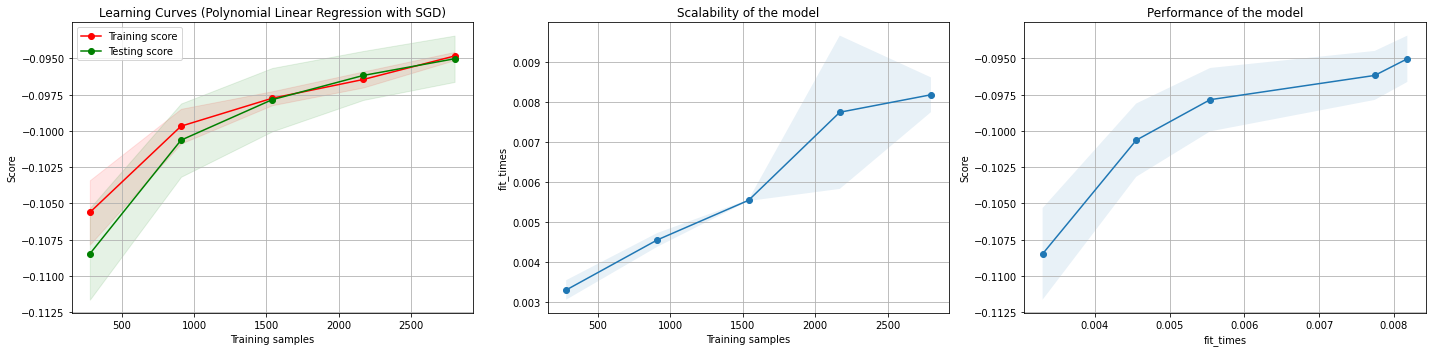

In [ ]:
# Plot learning curve
# Negative root-mean-squared error is used as loss metric
X, y = X_train, y_train
title = "Learning Curves (Polynomial Linear Regression with SGD)"
estimator = SGDRegressor()

plot_learning_curve(
    estimator,
    title,
    X,
    y,
    scoring="neg_root_mean_squared_error"
)

plt.tight_layout()
plt.show()

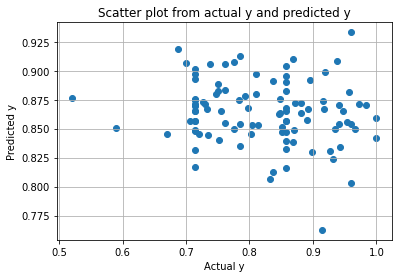

Test feature variables:
CNT_FAM_MEMBERS      0.000000
birth_day            0.127907
education_level      0.500000
email                0.000000
employment_length    0.500000
family_status        0.750000
house_type           1.000000
income               0.664584
income_type          0.760512
mobile               1.000000
num_child            0.052632
own_car              1.000000
own_realty           1.000000
phone                1.000000
work_phone           0.000000
Name: 2796, dtype: float64
Predicted credit score: 0.8653734196586311


In [ ]:
# Use built model to predict entirely new data (100 data samples chosen randomly from the last 5000 rows)
appl_credit_data_new = appl_id_credit_score_bias.tail(5000).sample(100)

X_new = appl_credit_data_new[appl_credit_data.columns.difference(["id", "gender", "score"])]
y_new = appl_credit_data_new["score"]

polyfit = lm.predict(preg.fit_transform(X_new))


# Plotting expected_y against predicted_y
n_iter=100
plt.scatter(y_new, polyfit)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

# Print a sample of predicted data:
print("Test feature variables:")
print(X_test.iloc[10].drop("bias"))
print("Predicted credit score:", polyfit[10])

In [ ]:
# R-squared score:
print(r2_score(y_new, polyfit))

# Root mean square loss:
print(np.sqrt(mean_squared_error(y_new, polyfit)))

-0.37493013592906643
0.11206149088533746


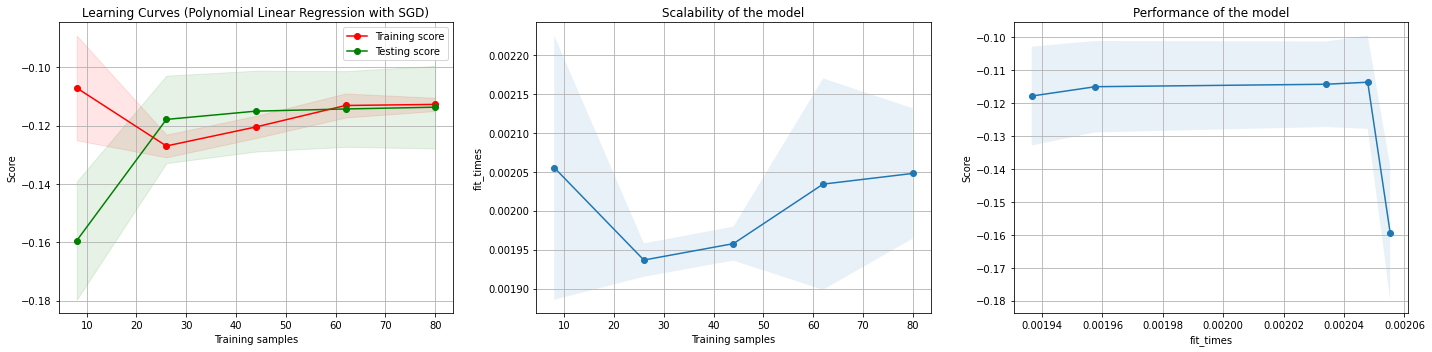

In [ ]:
# Plot learning curve for new data
X, y = X_new, y_new
title = "Learning Curves (Polynomial Linear Regression with SGD)"
estimator = SGDRegressor()

plot_learning_curve(
    estimator,
    title,
    X,
    y,
    scoring="neg_root_mean_squared_error"
)

plt.tight_layout()
plt.show()

The resulting loss of this model still seems to be sufficiently low when entirely new data is applied into the model. However, in view of the increased range of the mean-standard-deviation difference, we can consider further optimising the model by applying k-folds validation instead of train test split.

In [ ]:
# Sample 500 rows of data from first 20000 rows and perform 10-fold cross validation
appl_credit_data = appl_id_credit_score_bias.head(20000).sample(500, replace=True)

X = appl_credit_data[appl_credit_data.columns.difference(["id", "gender", "score"])]
y = appl_credit_data["score"]

kf = KFold(n_splits=10)

In [ ]:
# Polynomial linear regression with SGD and k-folds

def poly_sgd_regressor_with_kfolds(X, y):
  lm = SGDRegressor()
  train_round, rms, counter = [], [], 0
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    poly_model = PolynomialFeatures(degree=3)
    xpol = poly_model.fit_transform(X_train)
    preg = poly_model.fit(xpol, y_train)
    lm.fit(xpol, y_train[:, np.newaxis])
    polyfit = lm.predict(preg.fit_transform(X_test))
    rms.append(np.sqrt(mean_squared_error(y_test, polyfit)))
    train_round.append(counter)
    counter += 1
  return train_round, rms

train_round, rms = poly_sgd_regressor_with_kfolds(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

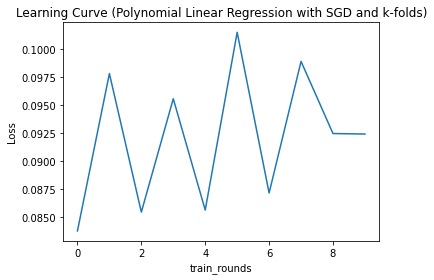

In [ ]:
# Plot learning curve for new data
title = "Losses (Polynomial Linear Regression with SGD and k-folds)"

plt.plot(train_round, rms)
plt.xlabel("train_rounds")
plt.ylabel("Loss")
plt.title(title)
plt.tight_layout()
plt.show()

## Logistic Regression Model

Next, for the scenario when we look for the binary class value ('good' or 'bad') instead of a continuous value of credit score, we can apply logistic regression for the dataset.

Here, we first define a threshold value of 0.5 and then assign rows in the dataset used in model training with credit score higher than that to have a class value (`score`) of 1, and 0 otherwise. We then fit the training data into the logistic regression model (with SGD) provided by `sklearn`.

In [ ]:
# Logistic regression with SGD
appl_id_credit_score_bin = appl_id_credit_score.copy(deep=True)
score, threshold = appl_id_credit_score_bin["score"], 0.5 # set threshold credit score as 0.5
appl_id_credit_score_bin["score"].mask(score <= threshold, 0, inplace=True) # replace credit scores below or equal to threshold by 0
appl_id_credit_score_bin["score"].mask(score > threshold, 1, inplace=True) # replace credit scores above threshold by 1

appl_id_credit_score_bin

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS,score
0,5008804,M,1,1,0.052632,0.263754,0.288290,0.50,1.00,0.8,0.258721,0.75,1,1,0,0,0.0,1.0
1,5008805,M,1,1,0.052632,0.263754,0.288290,0.50,1.00,0.8,0.258721,0.75,1,1,0,0,0.0,1.0
2,5008806,M,1,1,0.052632,0.816785,0.071165,0.50,0.75,1.0,0.055233,0.25,1,0,0,0,0.0,1.0
3,5008808,F,0,1,0.000000,0.678717,0.193298,1.00,0.50,1.0,0.156977,0.25,1,0,1,1,0.0,1.0
4,5008809,F,0,1,0.000000,0.678717,0.193298,1.00,0.50,1.0,0.156977,0.25,1,0,1,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30309,5149828,M,1,1,0.052632,0.575809,0.153096,0.50,0.75,1.0,0.186047,0.25,1,0,0,0,0.0,1.0
30310,5149834,F,0,1,0.052632,0.286065,0.083333,1.00,0.75,1.0,0.084302,0.75,1,0,1,1,0.0,0.0
30311,5149838,F,0,1,0.052632,0.286065,0.083333,0.25,0.75,1.0,0.084302,0.75,1,0,1,1,0.0,1.0
30312,5150049,F,0,1,0.052632,0.611436,0.040647,0.50,0.75,1.0,0.165698,0.25,1,0,0,0,0.0,1.0


In [ ]:
# Sample 5000 rows of data from first 20000 rows and perform basic train test split
appl_credit_data_bin = appl_id_credit_score_bin.head(20000).sample(5000, replace=True)

X = appl_credit_data_bin[appl_credit_data_bin.columns.difference(["id", "gender", "score"])]
y = appl_credit_data_bin["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3500, 15) (1500, 15)
(3500,) (1500,)


In [ ]:
# Logistic Regression with SGD
classifier = SGDClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Test feature variables:")
print(X_test.iloc[10])
print("Predicted class:", y_pred[10])

Test feature variables:
CNT_FAM_MEMBERS      0.052632
birth_day            0.186047
education_level      1.000000
email                0.000000
employment_length    0.250000
family_status        0.000000
house_type           0.600000
income               0.660262
income_type          0.116272
mobile               1.000000
num_child            0.052632
own_car              0.000000
own_realty           1.000000
phone                1.000000
work_phone           0.000000
Name: 12404, dtype: float64
Predicted class: 1.0


Confusion matrix: 
 [[   0    1]
 [   0 1499]]
Accuracy: 99.93333333333332%


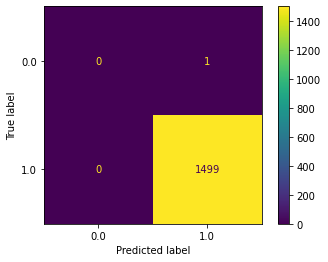

In [ ]:
# Evaluation metrics for logistic regression model
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100}%')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [ ]:
# Use built model to predict entirely new data (100 data samples chosen randomly from the last 5000 rows)
appl_credit_data_new = appl_id_credit_score_bin.tail(5000).sample(100)

X_new = appl_credit_data_new[appl_credit_data_new.columns.difference(["id", "gender", "score"])]
y_new = appl_credit_data_new["score"]

y_pred_new = classifier.predict(X_new)

print("Test feature variables:", X_test.iloc[10])
print("Predicted class:", y_pred[10])

Test feature variables: CNT_FAM_MEMBERS      0.052632
birth_day            0.186047
education_level      1.000000
email                0.000000
employment_length    0.250000
family_status        0.000000
house_type           0.600000
income               0.660262
income_type          0.116272
mobile               1.000000
num_child            0.052632
own_car              0.000000
own_realty           1.000000
phone                1.000000
work_phone           0.000000
Name: 12404, dtype: float64
Predicted class: 1.0


Confusion matrix: 
 [[100]]
Accuracy: 100.0%


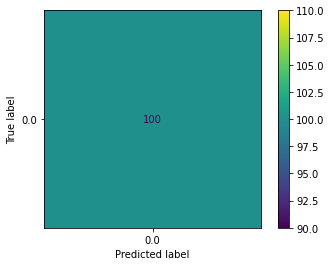

In [ ]:
cm_new = confusion_matrix(y_new, y_pred_new)
print("Confusion matrix: \n", cm_new)

print(f'Accuracy: {accuracy_score(y_new, y_pred_new) * 100}%')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=classifier.classes_)
disp.plot()

## Random Forest Model

Next, a random forest model for regression was employed to predict the credit scores of clients. Random forest consists of a large number of decision trees, each tree will predict an outcome after regression, and the model of which the prediction outcomes with the most votes will become the model's prediction. For more details, please refer to this <a href = "https://towardsdatascience.com/understanding-random-forest-58381e0602d2">link </a>.

In [ ]:
# Code based on example provided at: https://medium.com/swlh/predicting-weather-temperature-change-using-machine-learning-models-4f98c8983d08
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

forest_score = appl_id_credit_score


X = forest_score[['own_car', 'own_realty', 'num_child', 'income',
       'income_type', 'education_level', 'family_status', 'house_type',
       'birth_day', 'employment_length', 'mobile', 'work_phone', 'phone',
       'email', 'CNT_FAM_MEMBERS']]

y = forest_score.score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)


forestModel = make_pipeline(

    SelectKBest(k = "all"),
    preprocessing.Normalizer(),
    RandomForestRegressor(
        n_estimators = 100,
        max_depth = 50,
        random_state = 77,
        n_jobs = -1
    )
)

forestModel.fit(X_train, y_train)


mean_absolute_error(y_test, forestModel.predict(X_test))
print("Mean Absolute Error of Random Forest Model: ", mean_absolute_error)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Mean Absolute Error of Random Forest Model:  <function mean_absolute_error at 0x7f3ece267e60>


In [ ]:
y_pred = forestModel.predict(X_test)
errors = abs(y_pred - y_test)
mape = 100* (errors/ y_test)
accuracy = 100 - np.mean(mape)
print("The accuracy of the random forest model is: ", accuracy)

The accuracy of the random forest model is:  91.14596837574354


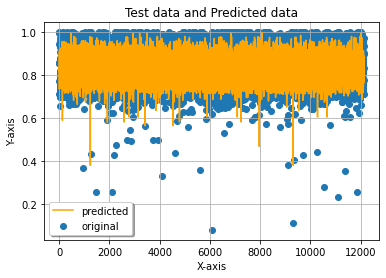

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted", color = "orange")
plt.title("Test data and Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

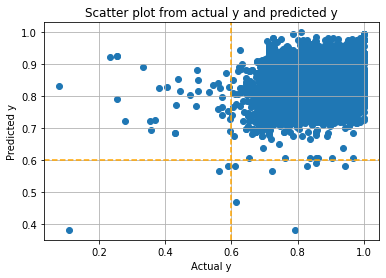

In [ ]:
plt.scatter(y_test, y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.axvline(x = 0.6, linestyle = "--", color = "orange")
plt.axhline(y = 0.6, linestyle = "--" ,color = "orange")
plt.title('Scatter plot from actual y and predicted y')
plt.show()

## Modification of Random Forest Model: Duplicating Minority Samples


In [ ]:
test = appl_id_credit_score

print(appl_id_credit_score[appl_id_credit_score["score"] < 0.1])

# The id for the worst client is 5042064
a = appl_id_credit_score[appl_id_credit_score["id"] == 5042064]

# Duplication of the data
for i in range(8000):
    test = test.append(a, ignore_index=True)


X = test[['own_car', 'own_realty', 'num_child', 'income',
       'income_type', 'education_level', 'family_status', 'house_type',
       'birth_day', 'employment_length', 'mobile', 'work_phone', 'phone',
       'email', 'CNT_FAM_MEMBERS']]

y = test.score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)


forestModel = make_pipeline(

    SelectKBest(k = "all"),
    preprocessing.Normalizer(),
    RandomForestRegressor(
        n_estimators = 100,
        max_depth = 50,
        random_state = 77,
        n_jobs = -1
    )
)

forestModel.fit(X_train, y_train)

mean_absolute_error(y_test, forestModel.predict(X_test))
print("Mean Absolute Error of Random Forest Model: ", mean_absolute_error)

            id gender  own_car  own_realty  num_child    income  income_type  \
3502   5024213      F        1           1   0.052632  0.479675     0.010703   
7890   5042064      F        1           0   0.157895  0.500175     0.468400   
20514  5117313      F        0           1   0.105263  0.323152     0.249363   
30103  5046324      F        0           1   0.105263  0.465892     0.143476   

       education_level  family_status  house_type  birth_day  \
3502              1.00           0.75         1.0   0.331395   
7890              0.75           0.75         1.0   0.156977   
20514             1.00           0.75         1.0   0.084302   
30103             1.00           0.50         1.0   0.084302   

       employment_length  mobile  work_phone  phone  email  CNT_FAM_MEMBERS  \
3502                0.75       1           0      1      0         0.000000   
7890                0.75       1           1      1      0         0.105263   
20514               0.25       1         

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Mean Absolute Error of Random Forest Model:  <function mean_absolute_error at 0x7f3ece267e60>


In [ ]:
y_pred = forestModel.predict(X_test)
errors = abs(y_pred - y_test)
mape = 100* (errors/ y_test)
accuracy = 100 - np.mean(mape)
print("The accuracy of the random forest model is: ", accuracy)

The accuracy of the random forest model is:  92.29044448736809


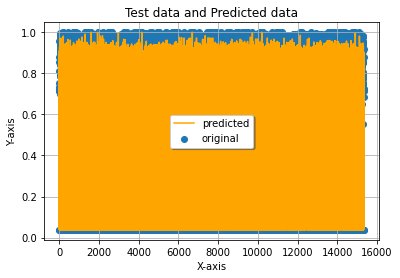

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted", color = "orange")
plt.title("Test data and Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

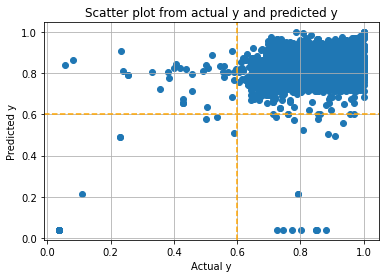

In [ ]:
plt.scatter(y_test, y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.axvline(x = 0.6, linestyle = "--", color = "orange")
plt.axhline(y = 0.6, linestyle = "--" ,color = "orange")
plt.title('Scatter plot from actual y and predicted y')
plt.show()

## Evaluation and Discussion

In this project, we have applied simple linear regression model with SGD, polynomial linear regression model with SGD, logistic regression model with SGD and random forest classifier to serve our aim of predicting the credibility of a credit card applicant based on his or her application particulars.

The linear regression models output a continuous credit score with a range from 0 to 1, with 1 being the highest credibility and 0 the lowest. Having a precise credit score metric allows credit card issuers to have a clearer understanding of how different information of an applicant affects the prediction of the credit score by the model. However, such score may be less straightforward for credit card issuers to immediately make a decision of whether or not the credit card should be issued.

The logistic regression model outputs a class prediction (0 or 1, with 0 indicating 'bad' and 1 indicating 'good') based on a pre-defined threshold value for the credit score. While model users may feel less confident about how exactly the prediction is made, the implementation of threshold value can allow more flexibility for the model users to adjust the model according to their needs. This approach is also able to obtain a high accuracy score.

In order to further improve the accuracy of the predictions, we have also attempted a random forest classifier model. This model has the capability to handle complex data like what used in this project and is able to achieve an accuracy of more than 90%.

## Limitations

### Data- preprocessing
- Large dataset which requires longer time and computational power to process data
- Illogical data appears in the dataset which require manual checking to be made
### Linear Regression
- Simple linear regression can be inaccurate due to non-linear data, need to use polynomial regression
- Linear Regression is limited to linear relationships
- Linear Regression is sensitive to outliers, therefore effort is needed to check for outliers and remove them if found
- Polynomial regression model with degree higher than 4 and train data with row more than 10000 is too computationally expensive
- Data must be independent (In the credit score case, an individuals credit score is unique and not affected by family members, therefore we do not have to account for this issue)
### Logistic Regression

- Manual definition of threshold value for training data
- Assumption of linearity between the dependent variable and the independent variables.
- Logistic Regression requires average or no multicollinearity between independent variables.


## Possible Improvements
### Data Pre-processing
- Jobs column was dropped as we didn't have enough context to determine the effect of different jobs towards the credit score (We could look up more info to determine the effects of different types of jobs)
- Gender wasn't taken into account in our models as we hope to achieve gender equality with our prediction model (However we could include to check if there is a bias in gender in the dataset)

### Simple Linear Regression with SGD

- To deal with imbalanced data, synthetic minority oversampling technique (SMOTE) could be applied
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

### Logistic Regression
- Neural Networks may be used to obtain more complex relationships between each variables